In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

In [21]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

In [2]:
df = pd.read_csv('/content/DailyDelhiClimate.csv')

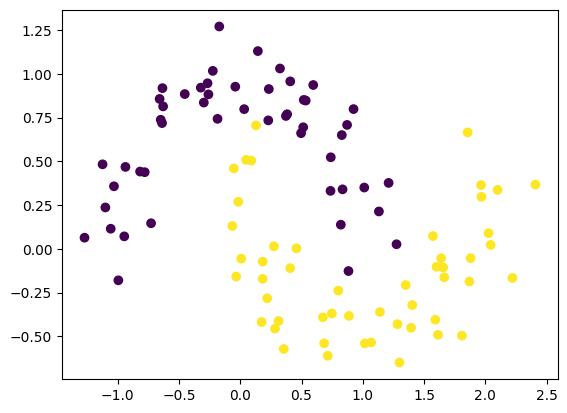

In [22]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [24]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train

array([[ 1.3506206 , -0.20663883],
       [-0.04098885,  0.92712414],
       [-0.9379972 ,  0.46846678],
       [ 0.73645602,  0.3315385 ],
       [ 2.40938072,  0.36744482],
       [ 1.21073294,  0.37721455],
       [-0.99578508, -0.17956306],
       [ 1.01642634, -0.54001915],
       [ 0.88304472, -0.12658445],
       [ 0.2196007 , -0.28235199],
       [-0.32279169,  0.92145523],
       [ 0.14332957,  1.13048376],
       [-0.01658646,  0.26904656],
       [ 0.73867736,  0.52356398],
       [ 1.40382802, -0.32089592],
       [-0.65891281,  0.857088  ],
       [-1.27201559,  0.064055  ],
       [ 0.67403854, -0.39105811],
       [ 0.8346617 ,  0.34040713],
       [ 1.13998191, -0.36088456],
       [ 0.51814426,  0.85146409],
       [ 2.22167197, -0.16625369],
       [ 1.39439184, -0.45063627],
       [ 0.18250721, -0.17104312],
       [ 2.02675758,  0.09006383],
       [-0.26038715,  0.88295876],
       [ 1.63958277, -0.0533336 ],
       [ 0.40767679,  0.9574049 ],
       [ 0.12784118,

In [33]:
from keras.layers import Dense
from keras.models import Sequential

In [34]:
model = Sequential()

In [36]:
model.add(Dense(64,activation='relu',input_dim=2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# first apply simple SGD
sgd = keras.optimizers.SGD(
    learning_rate=0.01,momentum=0.0,nesterov=False,name='SGD'
)

In [41]:
sgd

In [42]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# normally    optimizer=adam

In [44]:
history1 = model.fit(X_train, y_train, epochs=50,validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7188 - loss: 0.5754 - val_accuracy: 0.7500 - val_loss: 0.5971
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7500 - loss: 0.5900 - val_accuracy: 0.7500 - val_loss: 0.5963
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7708 - loss: 0.5794 - val_accuracy: 0.7500 - val_loss: 0.5954
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7917 - loss: 0.5623 - val_accuracy: 0.7500 - val_loss: 0.5946
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8021 - loss: 0.5590 - val_accuracy: 0.7500 - val_loss: 0.5939
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8125 - loss: 0.5548 - val_accuracy: 0.7500 - val_loss: 0.5931
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8021 - loss: 0.5621 - val_accuracy: 0.7500 - val_loss: 0.5924
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7917 - loss: 0.5632 - val_accuracy: 0.7500 - val_loss: 0.5916

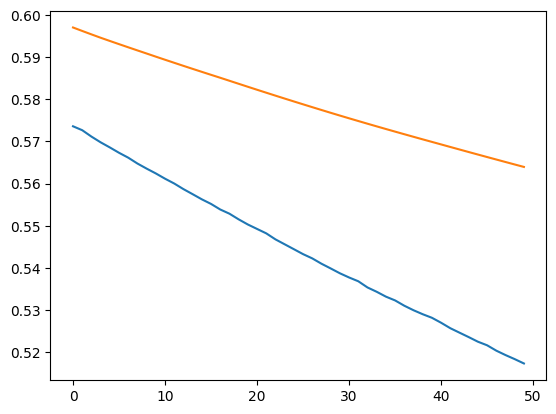

In [45]:

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

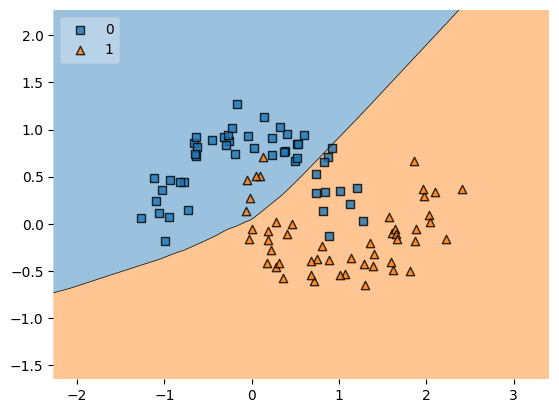

In [46]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:


# Define a simple model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])

# Use SGD optimizer
sgd = keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)


In [4]:
df = df[['date','meantemp']]

In [10]:
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1571,2017-04-20,34.500000
1572,2017-04-21,34.250000
1573,2017-04-22,32.900000
1574,2017-04-23,32.875000


In [6]:
import matplotlib.pyplot as plt

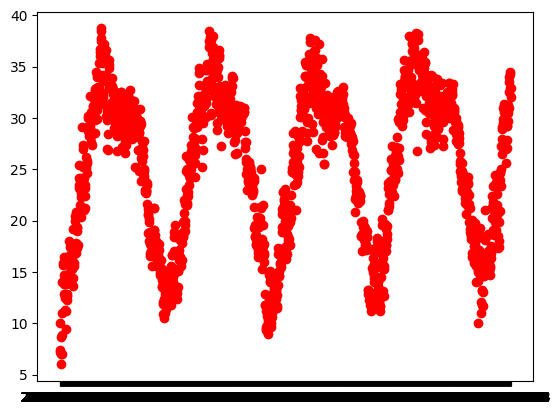

In [8]:
plt.scatter(df['date'],df['meantemp'],color='red')

In [11]:
x1 = df['meantemp'].ewm(alpha=0.2).mean() # alpha = 1- beta

In [12]:
x1

,meantemp
0,10.000000
1,8.555556
2,7.986339
3,8.216802
4,7.557354
...,...
1571,32.177088
1572,32.591670
1573,32.653336
1574,32.697669


In [13]:
df['ewm'] = x1

<ipython-input-13-f523b53ce042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewm'] = x1


In [14]:
df

,date,meantemp,ewm
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,8.555556
2,2013-01-03,7.166667,7.986339
3,2013-01-04,8.666667,8.216802
4,2013-01-05,6.000000,7.557354
...,...,...,...
1571,2017-04-20,34.500000,32.177088
1572,2017-04-21,34.250000,32.591670
1573,2017-04-22,32.900000,32.653336
1574,2017-04-23,32.875000,32.697669


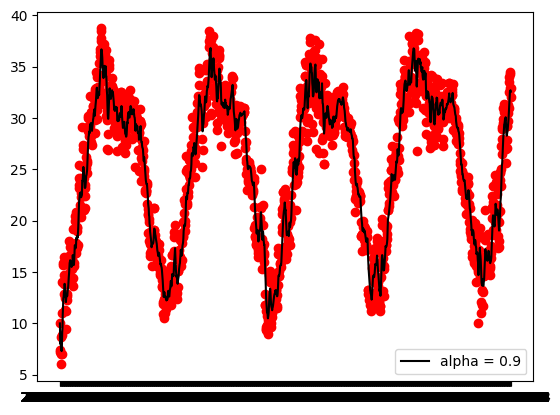

In [15]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x1,color='black',label='alpha = 0.2')
plt.legend()

In [16]:


x2 = df['meantemp'].ewm(alpha=0.5).mean()

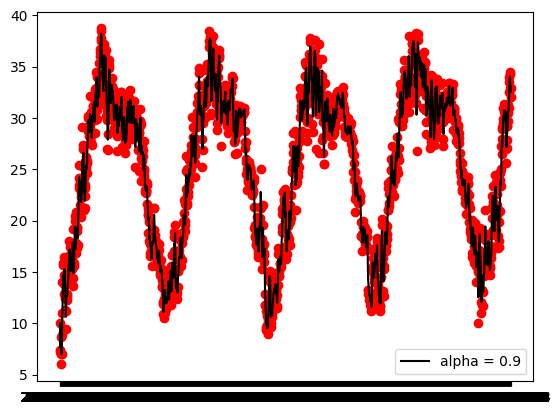

In [17]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x2,color='black',label='alpha = 0.9')
plt.legend()

In [18]:
x3 = df['meantemp'].ewm(alpha=0.9).mean()

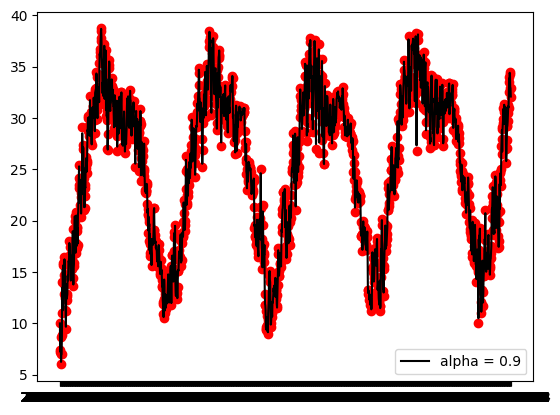

In [19]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x3,color='black',label='alpha = 0.9')
plt.legend()